In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import csv
import networkx as nx
import pickle

import sys
sys.path.insert(1, '../')
from utils import *

In [2]:
plt.rcParams.update({'font.size': 13})

## Functions:

In [3]:
def load_C_mean(filename):
    with open(filename, 'r') as csvfile:
        spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
        for row in spamreader:
            C = np.array([float(i) for i in row])
    return C

In [4]:
# cosine similarity between vectors
def similarity(v1,v2):
    
    return np.sum(v1*v2) / (np.sqrt((np.sum(v1*v1))*np.sum(v2*v2)))

In [5]:
#dataset = 'hospital'
#dataset = 'high_school'
#dataset = 'conference'
dataset = 'workplace'
#dataset = 'pr_school'

In [6]:
weighted = True

In [7]:
seed_size = 1

# Comparison matrices

## Varying $\beta_{|}$

In [8]:
mu = 0.1

Load all simplicial results

In [9]:
if dataset == 'hospital':
    beta_betaT_range = [(0.6,0.8),
                        (0.2,0.8),
                        (0.3,5),
                        (0.4,7.5),
                        (0.15,5),
                        (0.3,10),
                        (0.1,10),
                        (0.06,10),
                        (0.05,15),
                        (0.05,19)]
#elif dataset == 'high_school':
    
elif dataset == 'conference':
    beta_betaT_range = [(1,12),
                        (0.9,12),
                        (0.8,12),
                        (0.7,12),
                        (0.6,12),
                        (0.5,12),
                        (0.4,12)]   
elif dataset == 'pr_school':
    beta_betaT_range = [(0.07,7),
                        #(0.08,7),
                        (0.1,7),
                        #(0.11,6),
                        (0.1,5),
                        (0.2,7),
                        (0.15,5),
                        #(0.14,5),
                        (0.2,5),
                        #(0.17,4),
                        (0.2,3),
                        #(0.23,2),
                        (0.2,1),
                        #(0.26,1)
                        ]
elif dataset == 'workplace': 
    beta_betaT_range = [(0.5,7),
                        (0.4,7.3),
                        (0.3,6.5),
                        (0.25,6.5),
                        (0.25,7),
                        (0.2,7),
                        (0.2,7.3)]

In [10]:
C_list_simplicial = []
for (beta,betaT) in beta_betaT_range:
    filenameL = "../Simplicial_model/code/results/inf_treeSIR/CL_mean_weighted_%s_beta_%.3f_betaT_%.3f_mu_%.2f_init_1.csv"%(dataset,beta,betaT,mu)
    filenameT = "../Simplicial_model/code/results/inf_treeSIR/CT_mean_weighted_%s_beta_%.3f_betaT_%.3f_mu_%.2f_init_1.csv"%(dataset,beta,betaT,mu)
    CL = load_C_mean(filenameL)
    CT = load_C_mean(filenameT)
    C_list_simplicial.append(CL+CT)

In [11]:
len(C_list_simplicial)

7

Load all simple results

In [12]:
if dataset == 'hospital':
    beta_range = [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    R0_range = [1.20,1.53,1.77,2,2.22,2.38,2.56,2.7]

elif dataset == 'high_school':
    beta_range = [0.5,0.6,0.7,0.8,0.9,1.0]
    R0_range = [1.25,1.40,1.55,1.71,1.83,1.88]

elif dataset == 'workplace':
    beta_range = [0.3,0.4,0.5,0.6,0.7,0.8]
    R0_range = [1.26,1.55,1.82,2.06,2.22,2.40]

elif dataset == 'conference':
    beta_range = [0.6,0.7,0.8,0.9,1]
    R0_range = [1.21,1.37,1.49,1.60,1.74]
    
elif dataset == 'pr_school':
    beta_range = [0.12,0.15,0.18,0.21,0.24,0.27,0.3,0.33,0.36]
    R0_range = [1.40,1.65,1.97,2.11,2.31,2.48,2.68,2.84,3.01]

In [13]:
C_list_simple = []
for beta in beta_range:
    filename = "../Simple_model/code/results/inf_treeSIR/CL_mean_weighted_%s_beta_%.3f_betaT_0.000_mu_%.2f_init_%d.csv"%(dataset,beta,mu,seed_size)
    C = load_C_mean(filename)
    C_list_simple.append(C)

In [14]:
len(C_list_simple)

6

Compute similarity and put in matrix sim$\\$ (each row is a different $\theta$, each column a different $\beta_|$)

In [15]:
sim = np.full((len(beta_range),len(beta_betaT_range)),0.0)
for i in range(len(beta_range)):
    for j in range(len(beta_betaT_range)):            
        sim[i,j] = similarity(C_list_simple[i],C_list_simplicial[j])
        #print('riga',i,'col',j,'R0',R0_range[i],'beta betaT',beta_betaT_range[j])

In [16]:
def plot_sim_different_axes(sim, x_range, y_range, x_label, y_label, minValue_dataset, maxValue_dataset,save,scale):
    fig,ax = plt.subplots(1,1,figsize=(4.13,4))
    if scale == 'independent':
        maxValue = max([max(sim[n]) for n in range(len(sim))])
        minValue = min([min(sim[n][np.nonzero(sim[n])]) for n in range(len(sim)-1)])
    elif scale == 'fixed':
        minValue = minValue_dataset
        maxValue = maxValue_dataset

    print(minValue,maxValue)
    plt.rcParams.update({'font.size': 13})
    sns.heatmap(sim,
                xticklabels=x_range,
                yticklabels=y_range,
                annot=False,
                vmin=minValue,
                vmax=maxValue,
                cmap="viridis")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    #ax.set_title(title)
    plt.tight_layout()
    if save:
        if scale == 'independent':
            figname = 'figs/sim_simplicial_simple_%s_mu_%.3f.pdf'%(dataset,mu)
        elif scale == 'fixed':
            figname = 'figs/sim_simplicial_simple_%s_mu_%.3f_colorscale.pdf'%(dataset,mu)
        print(figname)
        plt.savefig(figname)
    plt.show()

In [20]:
if dataset == 'pr_school':
    minValue_dataset = 0.8708926301573268
    maxValue_dataset = 0.9930384288788436
elif dataset == 'hospital':
    minValue_dataset = 0.8191292897877029
    maxValue_dataset = 0.9978018310214777
elif dataset == 'workplace':
    minValue_dataset = 0.8918053167997326
    maxValue_dataset = 0.9911296969962261
elif dataset == 'high_school':
    minValue_dataset = 0.4273770824044987 
    maxValue_dataset = 0.940444458075442
elif dataset == 'conference':
    minValue_dataset = 0.9103281021232588 
    maxValue_dataset = 0.9968363331263105

0.8918053167997326 0.9891379460414468
figs/sim_simplicial_simple_workplace_mu_0.100.pdf


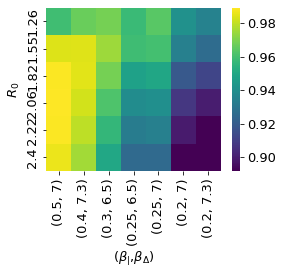

In [18]:
plot_sim_different_axes(sim, 
                        beta_betaT_range,
                        R0_range, 
                        r'($\beta_{|}$,$\beta_{\Delta}$)',
                        '$R_0$', 
                        minValue_dataset,
                        maxValue_dataset,
                        save=True,
                        scale='independent')

0.8918053167997326 0.9911296969962261
figs/sim_simplicial_simple_workplace_mu_0.100_colorscale.pdf


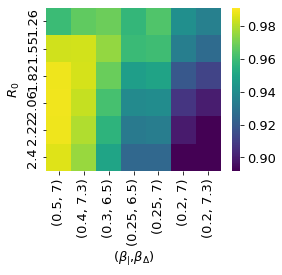

In [21]:
plot_sim_different_axes(sim, 
                        beta_betaT_range,
                        R0_range, 
                        r'($\beta_{|}$,$\beta_{\Delta}$)',
                        '$R_0$', 
                        minValue_dataset,
                        maxValue_dataset,
                        save=True,
                        scale='fixed')